# Linear Regression on Insurance Charges Dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [8]:
df=pd.read_csv("dataset for linear regression.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Checking outliers 

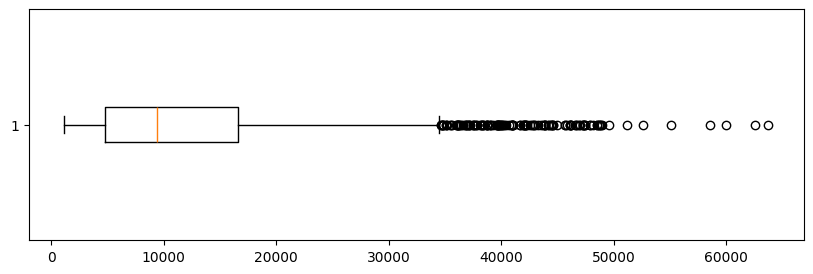

In [9]:
plt.figure(figsize=(10,3))
plt.boxplot(df["charges"],vert=False)
plt.show()

# Removing Outliers

In [10]:
df=df[df["charges"]<50000]
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


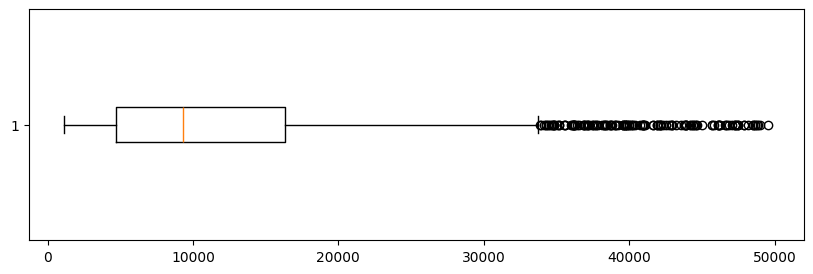

In [26]:
plt.figure(figsize=(10,3))
plt.boxplot(df["charges"],vert=False)
plt.show()

In [12]:
groupby=df.groupby("age")["charges"].mean().reset_index()
groupby.head()

,age,charges
0,18,7086.217556
1,19,9747.909335
2,20,10159.697736
3,21,4730.464330
4,22,10012.932802


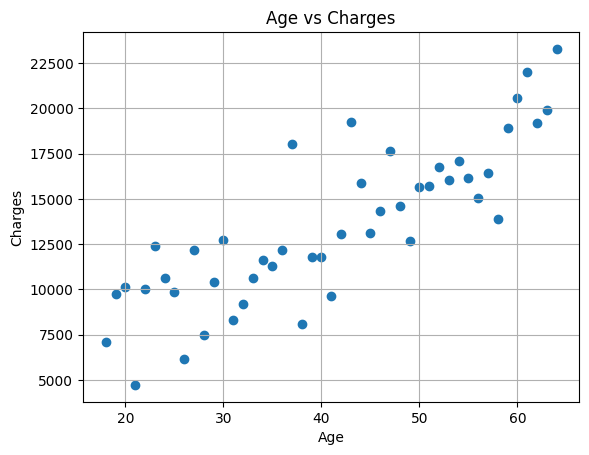

In [43]:
plt.scatter(groupby["age"],groupby["charges"])
plt.title("Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.grid()
plt.show()

In [14]:
groupby.corr()

,age,charges
age,1.000000,0.837495
charges,0.837495,1.000000


# Creating and Fiting Model for Linear Regression

In [15]:
model=LinearRegression()

In [16]:
x=groupby.drop("charges",axis=1)
y=groupby["charges"]

In [17]:
model.fit(x,y)

LinearRegression()

In [18]:
m=model.coef_
m

array([262.66217364])

In [19]:
c= model.intercept_
c

np.float64(2709.0969144000264)

# Prediction on Unknown Data

In [20]:
y_pred = model.predict(x)
y_pred

array([ 7437.01603996,  7699.6782136 ,  7962.34038724,  8225.00256088,
        8487.66473453,  8750.32690817,  9012.98908181,  9275.65125545,
        9538.3134291 ,  9800.97560274, 10063.63777638, 10326.29995002,
       10588.96212366, 10851.62429731, 11114.28647095, 11376.94864459,
       11639.61081823, 11902.27299187, 12164.93516552, 12427.59733916,
       12690.2595128 , 12952.92168644, 13215.58386009, 13478.24603373,
       13740.90820737, 14003.57038101, 14266.23255465, 14528.8947283 ,
       14791.55690194, 15054.21907558, 15316.88124922, 15579.54342286,
       15842.20559651, 16104.86777015, 16367.52994379, 16630.19211743,
       16892.85429108, 17155.51646472, 17418.17863836, 17680.840812  ,
       17943.50298564, 18206.16515929, 18468.82733293, 18731.48950657,
       18994.15168021, 19256.81385385, 19519.4760275 ])

In [33]:
age=40
chg=m*age + c
f"Age is {age} and expected Charges is {np.round(chg)}"

'Age is 40 and expected Charges is [13216.]'

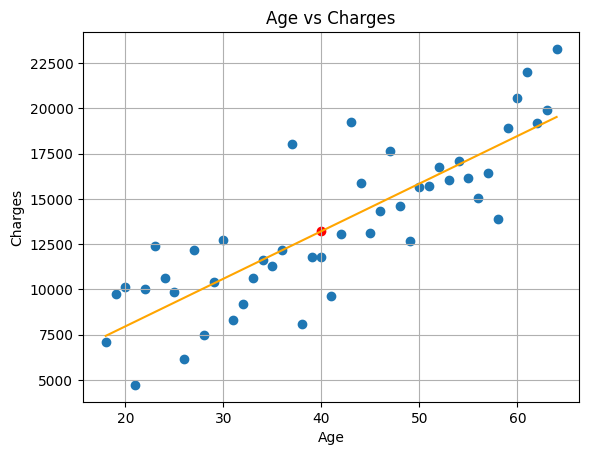

In [44]:
plt.scatter(groupby["age"],groupby["charges"])
plt.plot(groupby["age"],y_pred,color="orange")
plt.scatter(age,chg,color="red")
plt.title("Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.grid()
plt.show()

# Model Evaluation

In [35]:
mse = np.round(mean_squared_error(y,y_pred),2)
mse

np.float64(5404308.63)

In [36]:
rmse = np.round(np.sqrt(mse),2)
rmse

np.float64(2324.72)

RMSE:
* The RMSE value of 2324.72 suggests that, on average, the model's predictions deviate from the actual values by approximately 2,320 units.
* It helps gauge the typical prediction error.

In [45]:
r2 = np.round(r2_score(y,y_pred),2)
r2

np.float64(0.7)

R2:
* An 𝑅2 of 0.7 indicates that 70% of the variance in the target variable is explained by the model.
* The remaining 29% is due to unexplained variability or factors not included in the model.
* 𝑅2 values range from 0 (no explanatory power) to 1 (perfect explanatory power).

In [38]:
n=len(y)
k=1
n,k

(47, 1)

In [46]:
adj_r2 =np.round((1-((1-r2)*(n-1) / (n-k-1))),2)
adj_r2

np.float64(0.69)

Adjusted R2:
* A slightly lower adjusted 𝑅2 (0.69) compared to 𝑅2 (0.7) indicates that the additional predictors in the model are helpful but may include some that contribute minimally.
* If adjusted 𝑅2 is significantly lower than 𝑅2, it suggests overfitting or irrelevant variables in the model.

Overall Evaluation:
* The model has a reasonable 𝑅2 (0.701), indicating a good fit but leaving room for improvement.
* The RMSE (2324.72) gives you a sense of the average prediction error in the context of your data. Consider whether this error is acceptable for your use case.
* Adjusted 𝑅2 is close to 𝑅2, suggesting a well-built model with minimal overfitting.
* If the errors (MSE, RMSE) seem large, consider:
    * Feature selection or engineering to improve the model.
    * Testing non-linear relationships if linear regression assumptions don't hold.
    * Checking for outliers, multicollinearity, or heteroscedasticity.

In [47]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


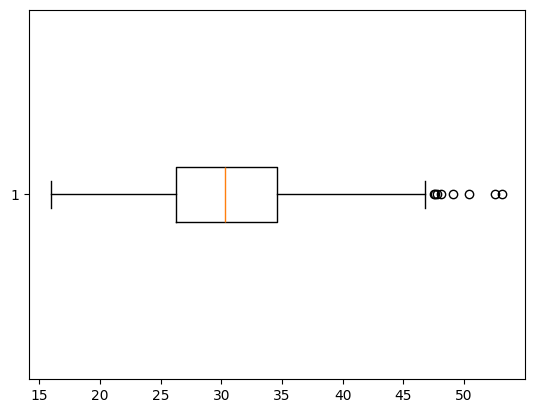

In [52]:
plt.boxplot(df["bmi"],vert=False)
plt.show()

In [54]:
groupby2=df.groupby("age")["bmi"].mean().reset_index()
groupby2.head()

,age,bmi
0,18,31.326159
1,19,28.596912
2,20,30.632759
3,21,28.185714
4,22,31.087679


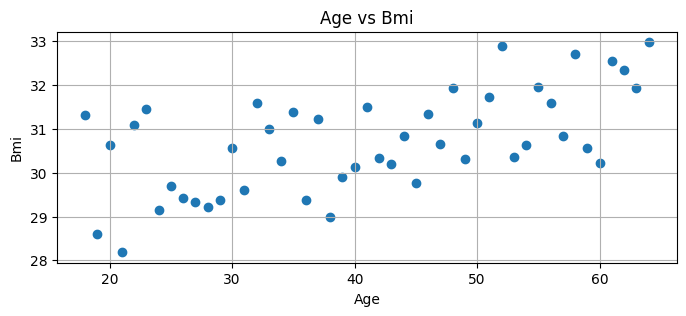

In [56]:
plt.figure(figsize=(8,3))
plt.scatter(groupby2["age"],groupby2["bmi"])
plt.title("Age vs Bmi")
plt.grid()
plt.xlabel("Age")
plt.ylabel("Bmi")
plt.show()

In [57]:
groupby2.corr()

,age,bmi
age,1.000000,0.599257
bmi,0.599257,1.000000


In [66]:
model2 = LinearRegression()

In [81]:
x2=groupby2.drop("bmi",axis=1)
y2=groupby2["bmi"]

In [82]:
model2.fit(x2,y2)

LinearRegression()

In [83]:
m2=model2.coef_
m2

array([0.05031113])

In [84]:
c2=model2.intercept_
c2

np.float64(28.636487736181788)

In [85]:
y2_pred = m2 * x + c2
y2_pred.head()

,age
0,29.542088
1,29.592399
2,29.642710
3,29.693021
4,29.743333


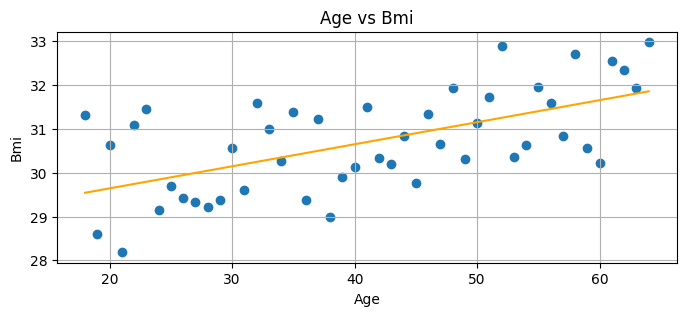

In [86]:
plt.figure(figsize=(8,3))
plt.scatter(groupby2["age"],groupby2["bmi"])
plt.plot(groupby2["age"],y2_pred,color="orange")
plt.title("Age vs Bmi")
plt.grid()
plt.xlabel("Age")
plt.ylabel("Bmi")
plt.show()

In [93]:
mse2 = np.round(mean_squared_error(y2,y2_pred),2)
mse2

np.float64(0.83)

MSE:
* A lower MSE indicates better model performance. 
* Here, 𝑀𝑆𝐸=0.83
* MSE=0.83 suggests that the squared prediction error is relatively low, but this value depends on the scale of the target variable.
* However, as it is in squared units, MSE is less interpretable on its own.

In [94]:
rmse2 = np.round(np.sqrt(mse2),2) 
rmse2

np.float64(0.91)

RMSE:
* RMSE=0.91 means that, on average, the model's predictions deviate from the actual values by approximately 0.91 units.
* Evaluate whether this level of error is acceptable in the context of your specific use case.

In [95]:
r22 = np.round(r2_score(y2,y2_pred),2)
r22

np.float64(0.36)

R2:
* An 𝑅2 of 0.36 indicates that only 36% of the variance in the target variable is explained by the features in the model.
* The remaining 64% of the variance is unexplained, suggesting that the model does not fully capture the underlying patterns in the data.

In [90]:
n=len(y2)
k=1
n,k

(47, 1)

In [96]:
adj2_r2 = np.round((1-((1-r22)*(n-1)) / (n-k-1)),2)
adj2_r2

np.float64(0.35)

Adjusted R2:
* The adjusted 𝑅2 is slightly lower than the 𝑅2 (0.35 vs. 0.36), suggesting that most features contribute meaningfully, but some may have limited utility.
* If the gap were larger, it could indicate overfitting or irrelevant predictors.

Overall Evaluation
* The 𝑅2 and adjusted 𝑅2 values (0.36 and 0.35) suggest that the model's explanatory power is weak. A large portion of the variance in the target variable remains unexplained.
𝑅𝑀𝑆𝐸=0.91
* RMSE=0.91 is relatively low, but whether this is "good" depends on the scale and domain of your target variable.
* Possible reasons for the low 𝑅2:
    * The relationship between the features and target is not linear (non-linear methods might perform better).
    * Important features are missing from the model.
    * Noise or randomness in the data makes prediction difficult.